# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [52]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns


# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [53]:
import mysql.connector
import getpass
import pandas as pd

# Obtener la contraseña de forma segura
saved_password = getpass.getpass()

# Establecer la conexión con la base de datos
cnx = mysql.connector.connect(user='root', password=saved_password, host='localhost', database='lab_customers_data')
cursor = cnx.cursor()

# Ejecutar la consulta SQL
query = "SELECT * FROM wholesale_customers_data;"
cursor.execute(query)

# Obtener los nombres de las columnas
column_names = [i[0] for i in cursor.description]

# Obtener los resultados
results = cursor.fetchall()

# Convertir los resultados y los nombres de las columnas en un DataFrame
df = pd.DataFrame(results, columns=column_names)

# Cerrar el cursor y la conexión
cursor.close()
cnx.close()

# Mostrar el DataFrame
print(df)

········
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..    

In [54]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

What does each column mean?
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
Channel is the way of market
Region is where the customer is located
Fresh is if the product is fresh: frutis, meat...
Milk is related to milk products
Grocery is related to products that are not fresh neither frozen
Frozen is related to frozen products
Detergent_Paper is related to cleaning products
Delicatessen is related to gourmet products
Channel is the channel, reg
Any categorical data to convert?:NO
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Any missing data to remove?:NO
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dty

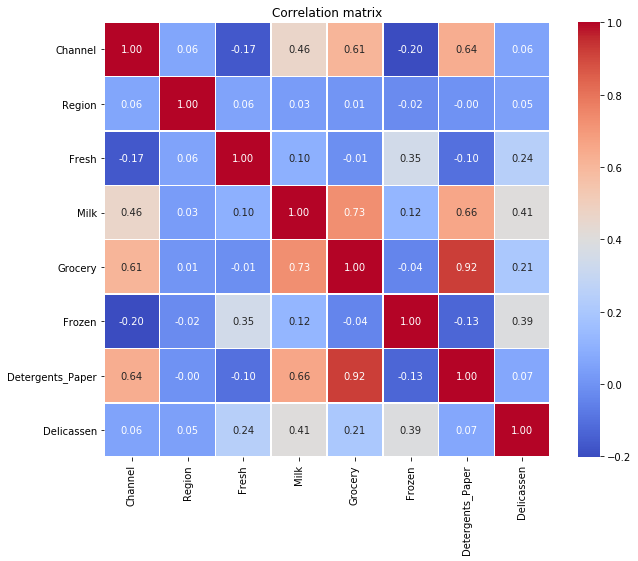

High correlations: Channel with Grocecy, Channel with Detergents_Paper,also Channel with Milk and Milk with Grocery and Detergents_Paper. Grocery with Detergent Paper


In [55]:
# Your code here:
#What does each column mean?
print('What does each column mean?')
print(df.columns)
print('Channel is the way of market')
print('Region is where the customer is located')
print('Fresh is if the product is fresh: frutis, meat...')
print('Milk is related to milk products')
print('Grocery is related to products that are not fresh neither frozen')
print('Frozen is related to frozen products')
print('Detergent_Paper is related to cleaning products')
print('Delicatessen is related to gourmet products')
print('Channel is the channel, reg')
#Any categorical data to convert?
print('Any categorical data to convert?:NO')
print(df.dtypes)
#Any missing data to remove?
print('Any missing data to remove?:NO')
print(df.isnull().sum())

# Column collinearity - any high correlations?
print('Column collinearity - any high correlations?')
correlation_matrix = df.corr()
correlation_matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()
print('High correlations: Channel with Grocecy, Channel with Detergents_Paper,also Channel with Milk and Milk with Grocery and Detergents_Paper. Grocery with Detergent Paper')

In [56]:
# Your observations here


grouped = df.groupby(['Channel','Region']).sum()
#'Fresh', 'Milk','Grocery', 'Frozen','Detergents_Paper', 'Delicassen'
grouped

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

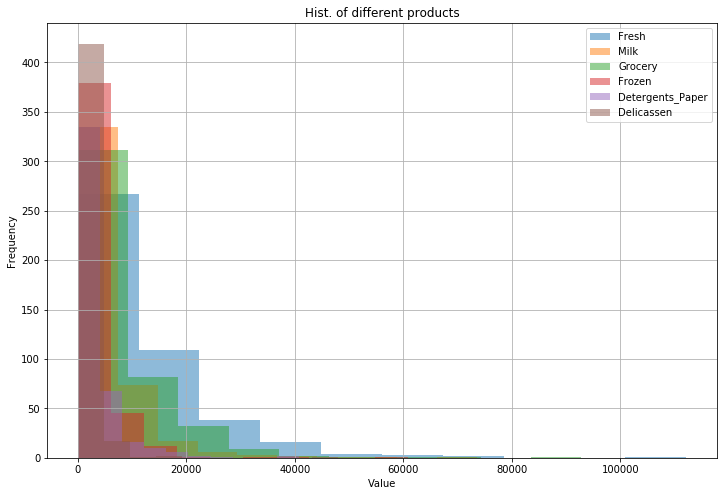

More inversion n fresh, grocery and milks products but less frequency than detergents, delicassen and frozen products


In [57]:

fig, ax = plt.subplots(figsize=(12, 8))


for column in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    df[column].hist(alpha=0.5, ax=ax, label=column)  


ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Hist. of different products')
ax.legend()


plt.show()

print('More inversion n fresh, grocery and milks products but less frequency than detergents, delicassen and frozen products')

In [58]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [59]:
# Your code here
print('High distance between mean values and 75 percentile. For that reason, wea are going to consider as outliers those that are out of percentile 85 and below percentile 15. We will replace those values by the mean')


High distance between mean values and 75 percentile. For that reason, wea are going to consider as outliers those that are out of percentile 85 and below percentile 15. We will replace those values by the mean


In [60]:
# Your comment here
df_origen = df
percentile_15 = df.quantile(0.15)
percentile_85 = df.quantile(0.85)


outliers = (df < percentile_15) | (df > percentile_85)


for column in df.columns[2:]:  
    column_mean = df[column].mean()
    df.loc[outliers[column], column] = column_mean


df_filtered=df
df_filtered

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.000000,9656.000000,7561.000000,3071.931818,2674.000000,1338.000000
1,2,3,7057.000000,9810.000000,9568.000000,1762.000000,3293.000000,1776.000000
2,2,3,6353.000000,8808.000000,7684.000000,2405.000000,3516.000000,1524.870455
3,1,3,13265.000000,1196.000000,4221.000000,3071.931818,507.000000,1788.000000
4,2,3,12000.297727,5410.000000,7198.000000,3915.000000,1777.000000,1524.870455
...,...,...,...,...,...,...,...,...
435,1,3,12000.297727,5796.265909,7951.277273,3071.931818,182.000000,2204.000000
436,1,3,12000.297727,1431.000000,7951.277273,4510.000000,2881.493182,2346.000000
437,2,3,14531.000000,5796.265909,7951.277273,437.000000,2881.493182,1867.000000
438,1,3,10290.000000,1981.000000,2232.000000,1038.000000,2881.493182,2125.000000


In [61]:
df_filtered.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,10195.909773,4635.697955,6415.533182,2294.747727,1994.354773,1201.563409
std,0.468052,0.774272,4793.342747,2152.599989,3160.558864,1214.675256,1498.267787,538.030198
min,1.000000,1.000000,1821.000000,1080.000000,1648.000000,425.000000,169.000000,255.000000
25%,1.000000,2.000000,6136.250000,2681.250000,3315.750000,1119.000000,489.750000,711.500000
50%,1.000000,3.000000,12000.297727,5485.000000,7578.000000,2524.000000,2171.000000,1398.500000
75%,2.000000,3.000000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
max,2.000000,3.000000,22096.000000,9933.000000,14682.000000,5639.000000,6374.000000,2435.000000


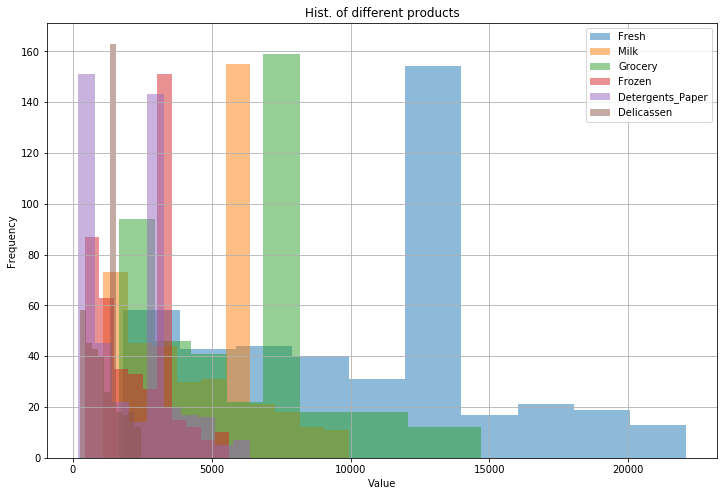

Now we see better that the frequency of products is similar but there are products more expensive: fresh, grocery,milk


In [63]:

fig, ax = plt.subplots(figsize=(12, 8))


for column in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    df_filtered[column].hist(alpha=0.5, ax=ax, label=column)  


ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Hist. of different products')
ax.legend()


plt.show()

print('Now we see better that the frequency of products is similar but there are products more expensive: fresh, grocery,milk')

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [67]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()

customers_scale = scaler.fit_transform(df_filtered)

customers_scale = pd.DataFrame(customers_scale, columns=df_filtered.columns)

customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.516530,2.334859,0.362838,0.640557,0.454137,0.253874
1,1.448652,0.590668,-0.655593,2.406481,0.998575,-0.439092,0.867751,1.068881
2,1.448652,0.590668,-0.802631,1.940468,0.401799,0.090870,1.016759,0.601593
3,-0.690297,0.590668,0.641011,-1.599746,-0.695140,0.640557,-0.993846,1.091210
4,1.448652,0.590668,0.376865,0.360115,0.247854,1.335416,-0.145236,0.601593
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,0.376865,0.539761,0.486462,0.640557,-1.211010,1.865281
436,-0.690297,0.590668,0.376865,-1.490451,0.486462,1.825816,0.592783,2.129507
437,1.448652,0.590668,0.905428,0.539761,0.486462,-1.531160,0.592783,1.238209
438,-0.690297,0.590668,0.019652,-1.234656,-1.325176,-1.035815,0.592783,1.718282


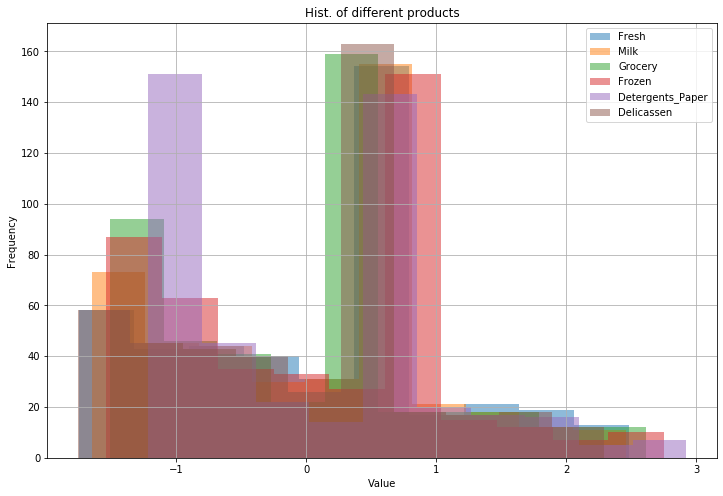

Good scaled process!


In [68]:

fig, ax = plt.subplots(figsize=(12, 8))


for column in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    customers_scale[column].hist(alpha=0.5, ax=ax, label=column)  


ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Hist. of different products')
ax.legend()


plt.show()

print('Good scaled process!')

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [107]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(customers_scale)

cluster_labels = kmeans.labels_

df_filtered['labels_K-Means'] = cluster_labels

df_filtered.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_K-Means
0,2,3,12669.000000,9656.0,7561.0,3071.931818,2674.0,1338.000000,2,-1,2
1,2,3,7057.000000,9810.0,9568.0,1762.000000,3293.0,1776.000000,2,-1,2
2,2,3,6353.000000,8808.0,7684.0,2405.000000,3516.0,1524.870455,2,-1,2
3,1,3,13265.000000,1196.0,4221.0,3071.931818,507.0,1788.000000,1,-1,1
4,2,3,12000.297727,5410.0,7198.0,3915.000000,1777.0,1524.870455,2,-1,2


Count the values in `labels`.

In [108]:
# Your code here:
df_filtered['labels_K-Means'].value_counts()

1    220
2    147
0     73
Name: labels_K-Means, dtype: int64

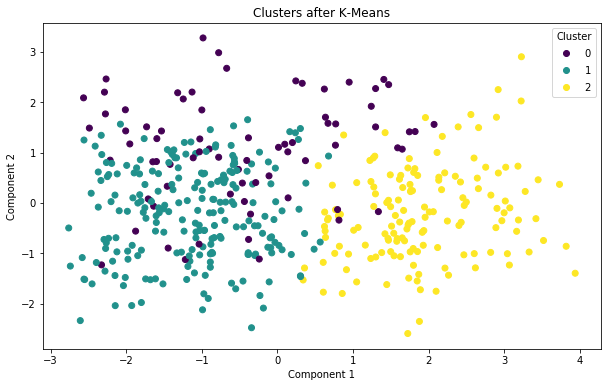

In [109]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
components = pca.fit_transform(customers_scale)

# Crear un DataFrame con las componentes principales y los labels de los clusters
df_plot = pd.DataFrame(components, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = cluster_labels

# Plotear los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_plot['Component 1'], df_plot['Component 2'], c=df_plot['Cluster'], cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters after K-Means')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [110]:
# Your code here
from sklearn.cluster import DBSCAN


cluster = DBSCAN(eps=0.5)
model = cluster.fit(customers_scale)
df_filtered['labels_DBSCAN'] = model.labels_


print(df_filtered.head())
print(df_filtered['labels_DBSCAN'].value_counts())
print('Maximum distance too low, we need to assume more distance between clusters to obtain some clusterization process')


   Channel  Region         Fresh    Milk  Grocery       Frozen  \
0        2       3  12669.000000  9656.0   7561.0  3071.931818   
1        2       3   7057.000000  9810.0   9568.0  1762.000000   
2        2       3   6353.000000  8808.0   7684.0  2405.000000   
3        1       3  13265.000000  1196.0   4221.0  3071.931818   
4        2       3  12000.297727  5410.0   7198.0  3915.000000   

   Detergents_Paper   Delicassen  labels  labels_DBSCAN  labels_K-Means  
0            2674.0  1338.000000       2             -1               2  
1            3293.0  1776.000000       2             -1               2  
2            3516.0  1524.870455       2             -1               2  
3             507.0  1788.000000       1             -1               1  
4            1777.0  1524.870455       2             -1               2  
-1    440
Name: labels_DBSCAN, dtype: int64
Maximum distance too low, we need to assume more distance between clusters to obtain some clusterization process


In [111]:
# Your code here
from sklearn.cluster import DBSCAN


cluster = DBSCAN(eps=0.75)
model = cluster.fit(customers_scale)
df_filtered['labels_DBSCAN'] = model.labels_


df_filtered.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_K-Means
0,2,3,12669.000000,9656.0,7561.0,3071.931818,2674.0,1338.000000,2,-1,2
1,2,3,7057.000000,9810.0,9568.0,1762.000000,3293.0,1776.000000,2,-1,2
2,2,3,6353.000000,8808.0,7684.0,2405.000000,3516.0,1524.870455,2,-1,2
3,1,3,13265.000000,1196.0,4221.0,3071.931818,507.0,1788.000000,1,-1,1
4,2,3,12000.297727,5410.0,7198.0,3915.000000,1777.0,1524.870455,2,-1,2


Count the values in `labels_DBSCAN`.

In [112]:
# Your code here
df_filtered['labels_DBSCAN'].value_counts()

-1    429
 0      6
 1      5
Name: labels_DBSCAN, dtype: int64

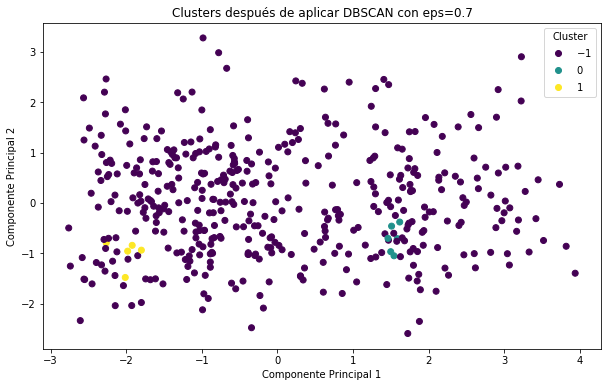

In [113]:
# Plotear los clusters en un gráfico de dispersión
# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
components = pca.fit_transform(customers_scale)

# Plotear los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=model.labels_, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters después de aplicar DBSCAN con eps=0.7')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [118]:
df_filtered['labels_DBSCAN'] = df_filtered['labels_DBSCAN'].astype('category')
df_filtered['labels_K-Means'] = df_filtered['labels_K-Means'].astype('category')
df_filtered['Detergents_Paper'] = pd.to_numeric(df_filtered['Detergents_Paper'], errors='coerce')
df_filtered['Milk'] = pd.to_numeric(df_filtered['Milk'], errors='coerce')
df_filtered.dtypes


Channel                int64
Region                 int64
Fresh                float64
Milk                 float64
Grocery              float64
Frozen               float64
Detergents_Paper     float64
Delicassen           float64
labels                 int32
labels_DBSCAN       category
labels_K-Means      category
dtype: object

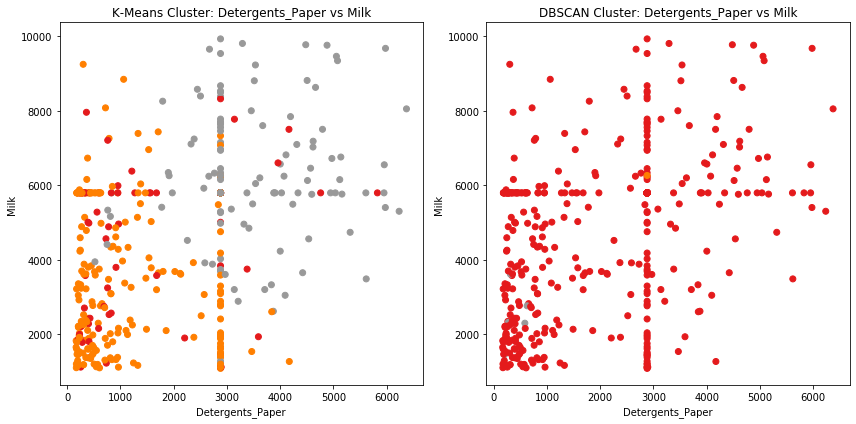

In [121]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=df_filtered['Detergents_Paper'], y=df_filtered['Milk'], c=df_filtered['labels_K-Means'], cmap='Set1')
plt.title('K-Means Cluster: Detergents_Paper vs Milk')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')


plt.subplot(1, 2, 2)
plt.scatter(x=df_filtered['Detergents_Paper'], y=df_filtered['Milk'], c=df_filtered['labels_DBSCAN'], cmap='Set1')
plt.title('DBSCAN Cluster: Detergents_Paper vs Milk')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

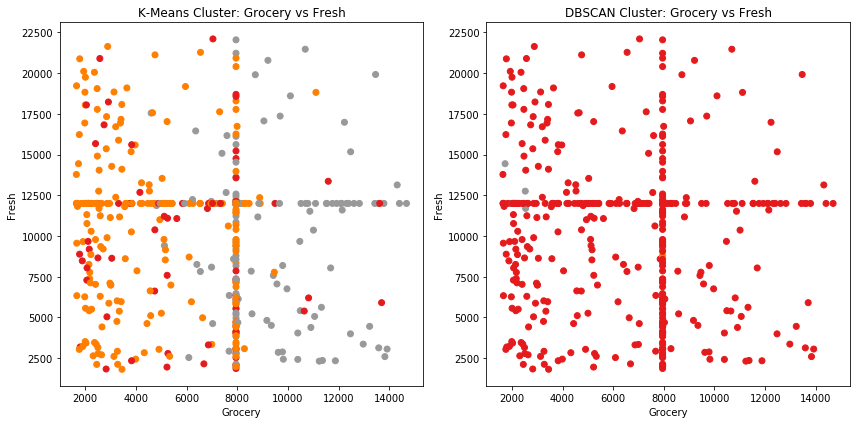

In [124]:
# Your code here:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=df_filtered['Grocery'], y=df_filtered['Fresh'], c=df_filtered['labels_K-Means'], cmap='Set1')
plt.title('K-Means Cluster: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')


plt.subplot(1, 2, 2)
plt.scatter(x=df_filtered['Grocery'], y=df_filtered['Fresh'], c=df_filtered['labels_DBSCAN'], cmap='Set1')
plt.title('DBSCAN Cluster: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

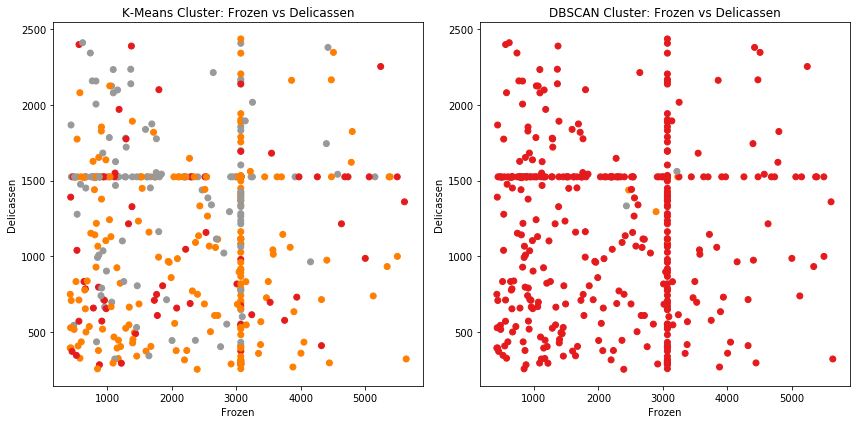

In [123]:
# Your code here:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=df_filtered['Frozen'], y=df_filtered['Delicassen'], c=df_filtered['labels_K-Means'], cmap='Set1')
plt.title('K-Means Cluster: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')


plt.subplot(1, 2, 2)
plt.scatter(x=df_filtered['Frozen'], y=df_filtered['Delicassen'], c=df_filtered['labels_DBSCAN'], cmap='Set1')
plt.title('DBSCAN Cluster: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [125]:
# Your code here:
df_filtered.groupby(['labels_K-Means','labels_DBSCAN']).mean()

Channel    Region         Fresh         Milk  \
labels_K-Means labels_DBSCAN                                                  
0              -1             1.150685  1.068493   9578.946046  4576.181413   
                0                  NaN       NaN           NaN          NaN   
                1                  NaN       NaN           NaN          NaN   
1              -1             1.009302  2.883721  10499.098425  3652.950211   
                0                  NaN       NaN           NaN          NaN   
                1             1.000000  3.000000  12577.119091  2487.200000   
2              -1             1.872340  2.751773   9952.862331  6188.512282   
                0             2.000000  3.000000  10565.315530  5874.221591   
                1                  NaN       NaN           NaN          NaN   

                                  Grocery       Frozen  Detergents_Paper  \
labels_K-Means labels_DBSCAN                                               
0              -1             5894.310336  2439.298257       1644.573474   
                0                     NaN          NaN               NaN   
                1                     NaN          NaN               NaN   
1              -1             4809.869133  2392.191755       1211.189239   
                0                     NaN          NaN               NaN   
                1             2153.200000  2974.359091        400.800000   
2              -1             9219.534881  2018.527724       3388.394262   
                0             7951.277273  2969.132576       2881.493182   
                1                     NaN          NaN               NaN   

                               Delicassen  labels  
labels_K-Means labels_DBSCAN                       
0              -1             1142.289726     0.0  
                0                     NaN     NaN  
                1                     NaN     NaN  
1              -1             1068.842484     1.0  
                0                     NaN     NaN  
                1             1360.800000     1.0  
2              -1             1421.126773     2.0  
                0             1386.123485     2.0  
                1                     NaN     NaN

Which algorithm appears to perform better?

In [126]:
# Your observations here
print('K-means. More sensitive and intuitive')

K-means. More sensitive and intuitive


# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here